<a href="https://colab.research.google.com/github/Eunhasuiin/Tensorflow-DeepLearning-Programing/blob/main/TDP_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Mean Square Error loss function

In [1]:
import numpy as np

#Mean square error calculate without tensorflow
def MSE(y,t): return np.sum((y-t)**2)/t.size 

t=np.array([1,2,3,4])
y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t))

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t))

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


In [3]:
import numpy as np
import tensorflow as tf

#calculate with reduce_mean() and square()
def MSE(y, t): return tf.reduce_mean(tf.square(y-t)) # It calculate first (y-t) ** 2 and get mean

t=np.array([1,2,3,4])
y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t).numpy()) # if there is not .numpy() -> MSE(y1,t) ==  tf.Tensor(1.875, shape=(), dtype=float64)

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t).numpy()) # if there is not .numpy() -> MSE(y2,t) ==  tf.Tensor(0.25, shape=(), dtype=float64)

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


In [7]:
import numpy as np
import tensorflow as tf

MSE=tf.keras.losses.MeanSquaredError() #make MSE to made funcion from keras

t=np.array([1,2,3,4])
t=tf.convert_to_tensor(t, dtype=tf.float32) #t is int32

y1=np.array([0.5, 1, 1.5, 2])
print("MSE(y1,t) == ", MSE(y1,t).numpy()) # if there is not .numpy() -> MSE(y1,t) ==  tf.Tensor(1.875, shape=(), dtype=float64)

y2=np.array([0.5, 1.5, 2.5, 3.5])
print("MSE(y2,t) == ", MSE(y2,t).numpy()) # if there is not .numpy() -> MSE(y2,t) ==  tf.Tensor(0.25, shape=(), dtype=float64)

MSE(y1,t) ==  1.875
MSE(y2,t) ==  0.25


# II Numpy simple linear regrssion

## 1. Gredient Decent

epoch=0: w=  0.9217, b=  0.0550, loss=  0.2144
epoch=10: w=  0.9920, b=  0.0607, loss=  0.0010
epoch=20: w=  0.9925, b=  0.0574, loss=  0.0009
epoch=30: w=  0.9929, b=  0.0543, loss=  0.0008
epoch=40: w=  0.9933, b=  0.0514, loss=  0.0007
epoch=50: w=  0.9936, b=  0.0486, loss=  0.0007
epoch=60: w=  0.9940, b=  0.0459, loss=  0.0006
epoch=70: w=  0.9943, b=  0.0434, loss=  0.0005
epoch=80: w=  0.9946, b=  0.0411, loss=  0.0005
epoch=90: w=  0.9949, b=  0.0389, loss=  0.0004
epoch=100: w=  0.9952, b=  0.0368, loss=  0.0004
epoch=110: w=  0.9954, b=  0.0348, loss=  0.0003
epoch=120: w=  0.9957, b=  0.0329, loss=  0.0003
epoch=130: w=  0.9959, b=  0.0311, loss=  0.0003
epoch=140: w=  0.9961, b=  0.0294, loss=  0.0002
epoch=150: w=  0.9963, b=  0.0278, loss=  0.0002
epoch=160: w=  0.9965, b=  0.0263, loss=  0.0002
epoch=170: w=  0.9967, b=  0.0249, loss=  0.0002
epoch=180: w=  0.9969, b=  0.0235, loss=  0.0002
epoch=190: w=  0.9971, b=  0.0223, loss=  0.0001
w=0.9972, b=0.0212, loss=0.0001

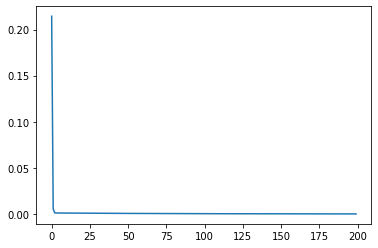

In [11]:
import numpy as np
def MSE(y,t): return np.sum((y-t)**2)/t.size  #loss function

x=np.arange(12)
t=np.arange(12)
loss_list=[]

#hyper_parameter setting
w=0.5
b=0
lr=1e-2

for epoch in range(200):
  y=w*x+b #2_dim linear function
  dW=np.sum((y-t)*x)*2/(x.size) # It came from f`(MSE)= (1/N) * sum((y-t)**2) y to w*x+b and partial derivative w
  dB=np.sum((y-t))*2/(x.size) # It came from f`(MSE)= (1/N) * sum((y-t)**2) y to w*x+b and partial derivative b

  w-=lr*dW #find next value of w
  b-=lr*dB #find next value of b

  y=w*x+b
  loss=MSE(y,t) #caclulate result of this epoch
  loss_list.append(loss)
  if not epoch % 10: print("epoch={}: w={:>8.4f}, b={:>8.4f}, loss={:>8.4f}".format(epoch, w, b, loss))

print("w={:>.4f}, b={:>.4f}, loss={:>.4f}".format(w, b, loss))

import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.show()